## Machine Learning

**Classify Potential And Unpotential Customers On Accepting Term Deposit Offers**

## Conclusion

**Random Forest Classifier Is The Best Model For Marketing Bank Term Deposit During Crisis**

**Random Forest Classifier Has A Good Recall, Accompanied With A Relatively Good Precision**

**This Model Might Dramaticaly Reduce The Marketing Expenses, Yet Still Highly Effective To Reach A Wide Number of Potential Customers**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('bank_marketing_campaign.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Data Preprocessing**

Handling Missing Value

In [3]:
df.drop(columns='pdays', inplace=True)


Drop Unecessary Columns

In [4]:
df.drop(columns='duration', inplace=True)

df.drop(columns='emp.var.rate', inplace=True)
df.drop(columns='cons.conf.idx', inplace=True)
df.drop(columns='cons.price.idx', inplace=True)

Change Data Type

In [5]:
df['y'] = df['y'].map({
    'no' : 0,
    'yes' : 1
})
df['y'] = df['y'].astype(int)

**Splitting Imbalance Data**

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop(columns='y')
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .90, stratify = y,random_state = 42)

**Checking Imbalance Dataset**

In [8]:
df_train = pd.concat([X_train, y_train], axis=1)

In [9]:
df_train['y'].value_counts()

0    32893
1     4176
Name: y, dtype: int64

**Over Sampled**

In [10]:
from sklearn.utils import resample

In [11]:
response_no = df_train[df_train['y'] == 0]
response_yes = df_train[df_train['y'] == 1]

response_Oversample = resample(response_yes,
                           replace=True,
                           n_samples = len(response_no),
                           random_state = 42)

In [12]:
df_OverSampled = pd.concat([response_no, response_Oversample])

df_OverSampled['y'].value_counts()

1    32893
0    32893
Name: y, dtype: int64

In [13]:
df = df_OverSampled

**Machine Learning Preprocessing**

Defined Variable for Oversampled Train

In [14]:
X_train = df.drop(columns='y')
y_train = df['y']

**Machine Learning**

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [16]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,euribor3m,nr.employed,y
8061,52,technician,divorced,professional.course,unknown,yes,no,telephone,jun,mon,8,0,nonexistent,4.865,5228.1,0
25300,36,management,married,university.degree,no,yes,no,cellular,nov,tue,2,0,nonexistent,4.153,5195.8,0
17667,53,blue-collar,married,high.school,no,yes,yes,cellular,jul,mon,2,0,nonexistent,4.962,5228.1,0
37400,45,blue-collar,single,basic.9y,no,yes,no,cellular,aug,wed,1,1,success,0.879,5076.2,0
4629,60,housemaid,married,high.school,unknown,yes,no,telephone,may,wed,1,0,nonexistent,4.858,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36526,38,technician,married,university.degree,no,no,no,cellular,jun,wed,1,0,nonexistent,1.260,5076.2,1
36743,43,blue-collar,married,basic.6y,no,yes,no,cellular,jun,mon,6,0,nonexistent,1.281,5076.2,1
38682,54,admin.,married,high.school,no,yes,no,cellular,nov,fri,1,3,success,0.716,5017.5,1
30490,57,admin.,single,university.degree,no,no,yes,cellular,may,mon,3,0,nonexistent,1.354,5099.1,1


In [17]:
cat_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

num_columns = ["age", "campaign", "previous", "euribor3m", "nr.employed"]

In [18]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

numerical_pipeline_s = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categorical', categorical_pipeline, cat_columns)
])

preprocessor_s = ColumnTransformer([
    ('numeric', numerical_pipeline_s, num_columns),
    ('categorical', categorical_pipeline, cat_columns)
])

In [19]:
pipe_Log = Pipeline([
    ("prep", preprocessor),
    ("algo", LogisticRegression())
])

pipe_KNN = Pipeline([
    ("prep", preprocessor_s),
    ("algo", KNeighborsClassifier())
])

In [20]:
pipe_RF = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

pipe_SVC = Pipeline([
    ("prep", preprocessor_s),
    ("algo", SVC(max_iter = 10))
])

In [21]:
pipe_Log.fit(X_train, y_train)
pipe_KNN.fit(X_train, y_train)
pipe_RF.fit(X_train, y_train)
pipe_SVC.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'campaign',
                                                   'previous', 'euribor3m',
                                                   'nr.employed']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                            

In [22]:
y_pred_Logtr = pipe_Log.predict(X_train)
acc_Logtr = accuracy_score(y_train, y_pred_Logtr)
prec_Logtr = precision_score(y_train, y_pred_Logtr)
rec0_Logtr = recall_score (y_train, y_pred_Logtr, pos_label=0)
rec1_Logtr = recall_score(y_train, y_pred_Logtr, pos_label=1)
f1_Logtr = f1_score(y_train, y_pred_Logtr)

y_pred_KNNtr = pipe_KNN.predict(X_train)
acc_KNNtr = accuracy_score(y_train, y_pred_KNNtr)
prec_KNNtr = precision_score(y_train, y_pred_KNNtr)
rec0_KNNtr = recall_score (y_train, y_pred_KNNtr, pos_label=0)
rec1_KNNtr = recall_score(y_train, y_pred_KNNtr, pos_label=1)
f1_KNNtr = f1_score(y_train, y_pred_KNNtr)

y_pred_RFtr = pipe_RF.predict(X_train)
acc_RFtr = accuracy_score(y_train, y_pred_RFtr)
prec_RFtr = precision_score(y_train, y_pred_RFtr)
rec0_RFtr = recall_score (y_train, y_pred_RFtr, pos_label=0)
rec1_RFtr = recall_score(y_train, y_pred_RFtr, pos_label=1)
f1_RFtr = f1_score(y_train, y_pred_RFtr)

y_pred_SVCtr = pipe_SVC.predict(X_train)
acc_SVCtr = accuracy_score(y_train, y_pred_SVCtr)
prec_SVCtr = precision_score(y_train, y_pred_SVCtr)
rec0_SVCtr = recall_score (y_train, y_pred_SVCtr, pos_label=0)
rec1_SVCtr = recall_score(y_train, y_pred_SVCtr, pos_label=1)
f1_SVCtr = f1_score(y_train, y_pred_SVCtr)


y_pred_Logts = pipe_Log.predict(X_test)
acc_Logts = accuracy_score(y_test, y_pred_Logts)
prec_Logts = precision_score(y_test, y_pred_Logts)
rec0_Logts = recall_score (y_test, y_pred_Logts, pos_label=0)
rec1_Logts = recall_score(y_test, y_pred_Logts, pos_label=1)
f1_Logts = f1_score(y_test, y_pred_Logts)

y_pred_KNNts = pipe_KNN.predict(X_test)
acc_KNNts = accuracy_score(y_test, y_pred_KNNts)
prec_KNNts = precision_score(y_test, y_pred_KNNts)
rec0_KNNts = recall_score (y_test, y_pred_KNNts, pos_label=0)
rec1_KNNts = recall_score(y_test, y_pred_KNNts, pos_label=1)
f1_KNNts = f1_score(y_test, y_pred_KNNts)

y_pred_RFts = pipe_RF.predict(X_test)
acc_RFts = accuracy_score(y_test, y_pred_RFts)
prec_RFts = precision_score(y_test, y_pred_RFts)
rec0_RFts = recall_score (y_test, y_pred_RFts, pos_label=0)
rec1_RFts = recall_score(y_test, y_pred_RFts, pos_label=1)
f1_RFts = f1_score(y_test, y_pred_RFts)

y_pred_SVCts = pipe_SVC.predict(X_test)
acc_SVCts = accuracy_score(y_test, y_pred_SVCts)
prec_SVCts = precision_score(y_test, y_pred_SVCts)
rec0_SVCts = recall_score (y_test, y_pred_SVCts, pos_label=0)
rec1_SVCts = recall_score(y_test, y_pred_SVCts, pos_label=1)
f1_SVCts = f1_score(y_test, y_pred_SVCts)

In [23]:
data = {
    "LogReg Train" : [acc_Logtr, prec_Logtr, rec1_Logtr, f1_Logtr],
    "LogReg Test" : [acc_Logts, prec_Logts, rec1_Logts, f1_Logts],
    "KNN Train" : [acc_KNNtr, prec_KNNtr, rec1_KNNtr, f1_KNNtr],
    "KNN Test" : [acc_KNNts, prec_KNNts, rec1_KNNts, f1_KNNts],
    "RF Train" : [acc_RFtr, prec_RFtr, rec1_RFtr, f1_RFtr],
    "RF Test" : [acc_RFts, prec_RFts, rec1_RFts, f1_RFts],
    "SVC Train" : [acc_SVCtr, prec_SVCtr, rec1_SVCtr, f1_SVCtr],
    "SVC Test" : [acc_SVCts, prec_SVCts, rec1_SVCts, f1_SVCts]
}
pd.DataFrame(data=data, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

,LogReg Train,LogReg Test,KNN Train,KNN Test,RF Train,RF Test,SVC Train,SVC Test
Accuracy,0.733758,0.796795,0.925744,0.779073,0.996580,0.884681,0.472517,0.796067
Precision,0.776941,0.314058,0.871439,0.267708,0.993206,0.485488,0.316335,0.056604
Recall,0.655793,0.678879,0.998845,0.553879,1.000000,0.396552,0.047335,0.051724
F1 Score,0.711245,0.429448,0.930802,0.360955,0.996591,0.436536,0.082348,0.054054


**Hyperparameter Tuning**

Parameter

In [24]:
Param_Log = {
    "algo__penalty" : ["l1","l2","elasticnet","none"],
    "algo__class_weight" : [dict, "balanced","none"],
    "algo__max_iter" : [10,100,500]
}

Param_KNN = {
    "algo__n_neighbors" : [155],
    "algo__weights" : ["distance","uniform"],
    "algo__leaf_size" : [75]
}

Param_RF = {
    "algo__n_estimators" : [1500],
    "algo__min_samples_split" : [155],
    "algo__min_samples_leaf" : [70]
}

Param_SVC = {
    "algo__max_iter" : [20],
    "algo__kernel" : ['poly', 'rbf', 'sigmoid'],
    "algo__gamma" : [0.01, 100],
    "algo__cache_size" : [2000]
}

In [25]:
from sklearn.model_selection import GridSearchCV

**Logistic Regression Tuning**

In [26]:
model_tuned_1 = GridSearchCV(estimator=pipe_Log, param_grid=Param_Log, cv = 3, n_jobs=-1, verbose=1)

model_tuned_1.fit(X_train, y_train)
model_tuned_1.best_score_
model_tuned_1_1 = model_tuned_1.best_estimator_
y_tune_1_train = model_tuned_1_1.predict(X_train)
y_tune_1_test = model_tuned_1_1.predict(X_test)

print('Best Score :',model_tuned_1.best_score_)
print('Tuned recall LogReg Tuned Train : ', recall_score(y_train, y_tune_1_train))
print('Tuned recall LogReg Tuned Test : ', recall_score(y_test, y_tune_1_test))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  1.1min finished


Best Score : 0.7341531365913543
Tuned recall LogReg Tuned Train :  0.6543641504271426
Tuned recall LogReg Tuned Test :  0.6724137931034483


In [27]:
precision_score(y_test, y_tune_1_test)

0.31451612903225806

**KNN Tuning**

In [28]:
model_tuned_2 = GridSearchCV(estimator=pipe_KNN, param_grid=Param_KNN, cv = 3, n_jobs=-1, verbose=1)

model_tuned_2.fit(X_train, y_train)
model_tuned_2.best_score_
model_tuned_2_1 = model_tuned_2.best_estimator_
y_tune_2_train = model_tuned_2_1.predict(X_train)
y_tune_2_test = model_tuned_2_1.predict(X_test)

print('Best Score :',model_tuned_2.best_score_)
print('Tuned recall KNN Tuned Train : ', recall_score(y_train, y_tune_2_train))
print('Tuned recall KNN Tuned Test : ', recall_score(y_test, y_tune_2_test))

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:  4.3min remaining:  8.7min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  5.1min finished


Best Score : 0.915711498464856
Tuned recall KNN Tuned Train :  1.0
Tuned recall KNN Tuned Test :  0.6206896551724138


**Random Forest Tuning**

In [29]:
model_tuned_3 = GridSearchCV(estimator=pipe_RF, param_grid=Param_RF, cv = 3, n_jobs=-1, verbose=1)

model_tuned_3.fit(X_train, y_train)
model_tuned_3.best_score_
model_tuned_3_1 = model_tuned_3.best_estimator_
y_tune_3_train = model_tuned_3_1.predict(X_train)
y_tune_3_test = model_tuned_3_1.predict(X_test)

print('Best Score :',model_tuned_3.best_score_)
print('Tuned recall RF Tuned Train : ', recall_score(y_train, y_tune_3_train))
print('Tuned recall RF Tuned Test : ', recall_score(y_test, y_tune_3_test))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.8min finished


Best Score : 0.7539293865628846
Tuned recall RF Tuned Train :  0.6473413796248442
Tuned recall RF Tuned Test :  0.6314655172413793


**SVC Tuning**

In [34]:
model_tuned_4 = GridSearchCV(estimator=pipe_SVC, param_grid=Param_SVC, cv = 3, n_jobs=-1, verbose=1)

model_tuned_4.fit(X_train, y_train)
model_tuned_4.best_score_
model_tuned_4_1 = model_tuned_4.best_estimator_
y_tune_4_train = model_tuned_4_1.predict(X_train)
y_tune_4_test = model_tuned_4_1.predict(X_test)

print('Best Score :',model_tuned_4.best_score_)
print('Tuned recall SVC Tuned Train : ', recall_score(y_train, y_tune_4_train))
print('Tuned recall SVC Tuned Test : ', recall_score(y_test, y_tune_4_test))

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   12.6s finished


Best Score : 0.5667771831679463
Tuned recall SVC Tuned Train :  0.8051257106375217
Tuned recall SVC Tuned Test :  0.7931034482758621


**Evaluation Metrics Tuned**

In [35]:
acc_Logtr_tuned = accuracy_score(y_train, y_tune_1_train)
prec_Logtr_tuned = precision_score(y_train, y_tune_1_train)
rec0_Logtr_tuned = recall_score(y_train, y_tune_1_train, pos_label=0)
rec1_Logtr_tuned = recall_score(y_train, y_tune_1_train, pos_label=1)
f1_Logtr_tuned = f1_score(y_train, y_tune_1_train)

acc_KNNtr_tuned = accuracy_score(y_train, y_tune_2_train)
prec_KNNtr_tuned = precision_score(y_train, y_tune_2_train)
rec0_KNNtr_tuned = recall_score(y_train, y_tune_2_train, pos_label=0)
rec1_KNNtr_tuned = recall_score(y_train, y_tune_2_train, pos_label=1)
f1_KNNtr_tuned = f1_score(y_train, y_tune_2_train)

acc_RFtr_tuned = accuracy_score(y_train, y_tune_3_train)
prec_RFtr_tuned = precision_score(y_train, y_tune_3_train)
rec0_RFtr_tuned = recall_score(y_train, y_tune_3_train, pos_label=0)
rec1_RFtr_tuned = recall_score(y_train, y_tune_3_train, pos_label=1)
f1_RFtr_tuned = f1_score(y_train, y_tune_3_train)

acc_SVCtr_tuned = accuracy_score(y_train, y_tune_4_train)
prec_SVCtr_tuned = precision_score(y_train, y_tune_4_train)
rec0_SVCtr_tuned = recall_score(y_train, y_tune_4_train, pos_label=0)
rec1_SVCtr_tuned = recall_score(y_train, y_tune_4_train, pos_label=1)
f1_SVCtr_tuned = f1_score(y_train, y_tune_4_train)


acc_Logts_tuned = accuracy_score(y_test, y_tune_1_test)
prec_Logts_tuned = precision_score(y_test, y_tune_1_test)
rec0_Logts_tuned = recall_score(y_test, y_tune_1_test, pos_label=0)
rec1_Logts_tuned = recall_score(y_test, y_tune_1_test, pos_label=1)
f1_Logts_tuned = f1_score(y_test, y_tune_1_test)

acc_KNNts_tuned = accuracy_score(y_test, y_tune_2_test)
prec_KNNts_tuned = precision_score(y_test, y_tune_2_test)
rec0_KNNts_tuned = recall_score(y_test, y_tune_2_test, pos_label=0)
rec1_KNNts_tuned = recall_score(y_test, y_tune_2_test, pos_label=1)
f1_KNNts_tuned = f1_score(y_test, y_tune_2_test)

acc_RFts_tuned = accuracy_score(y_test, y_tune_3_test)
prec_RFts_tuned = precision_score(y_test, y_tune_3_test)
rec0_RFts_tuned = recall_score(y_test, y_tune_3_test, pos_label=0)
rec1_RFts_tuned = recall_score(y_test, y_tune_3_test, pos_label=1)
f1_RFts_tuned = f1_score(y_test, y_tune_3_test)

acc_SVCts_tuned = accuracy_score(y_test, y_tune_4_test)
prec_SVCts_tuned = precision_score(y_test, y_tune_4_test)
rec0_SVCts_tuned = recall_score(y_test, y_tune_4_test, pos_label=0)
rec1_SVCts_tuned = recall_score(y_test, y_tune_4_test, pos_label=1)
f1_SVCts_tuned = f1_score(y_test, y_tune_4_test)

In [36]:
data = {
    "LogReg Tuned Train" : [acc_Logtr_tuned, prec_Logtr_tuned, rec1_Logtr_tuned, f1_Logtr_tuned],
    "LogReg Tuned Test" : [acc_Logts_tuned, prec_Logts_tuned, rec1_Logts_tuned, f1_Logts_tuned],
    "KNN Tuned Train" : [acc_KNNtr_tuned, prec_KNNtr_tuned, rec1_KNNtr_tuned, f1_KNNtr_tuned],
    "KNN Tuned Test" : [acc_KNNts_tuned, prec_KNNts_tuned, rec1_KNNts_tuned, f1_KNNts_tuned],
    "RF Tuned Train" : [acc_RFtr_tuned, prec_RFtr_tuned, rec1_RFtr_tuned, f1_RFtr_tuned],
    "RF Tuned Test" : [acc_RFts_tuned, prec_RFts_tuned, rec1_RFts_tuned, f1_RFts_tuned],
    "SVC Tuned Train" : [acc_SVCtr_tuned, prec_SVCtr_tuned, rec1_SVCtr_tuned, f1_SVCtr_tuned],
    "SVC Tuned Test" : [acc_SVCts_tuned, prec_SVCts_tuned, rec1_SVCts_tuned, f1_SVCts_tuned]
}
pd.DataFrame(data=data, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

,LogReg Tuned Train,LogReg Tuned Test,KNN Tuned Train,KNN Tuned Test,RF Tuned Train,RF Tuned Test,SVC Tuned Train,SVC Tuned Test
Accuracy,0.734001,0.798009,0.996580,0.806506,0.760253,0.845351,0.550649,0.350813
Precision,0.778332,0.314516,0.993206,0.316832,0.836167,0.386034,0.533566,0.124915
Recall,0.654364,0.672414,1.000000,0.620690,0.647341,0.631466,0.805126,0.793103
F1 Score,0.710985,0.428571,0.996591,0.419519,0.729737,0.479150,0.641802,0.215836


**Confusion Matrix**

In [37]:
cmLog = confusion_matrix(y_test, y_tune_1_test, labels=[1, 0])
dfLog = pd.DataFrame(data=cmLog, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

cmKNN = confusion_matrix(y_test, y_tune_2_test, labels=[1, 0])
dfKNN = pd.DataFrame(data=cmKNN, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

cmRF = confusion_matrix(y_test, y_tune_3_test, labels=[1, 0])
dfRF = pd.DataFrame(data=cmRF, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

cmSVC = confusion_matrix(y_test, y_tune_4_test, labels=[1, 0])
dfSVC = pd.DataFrame(data=cmSVC, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

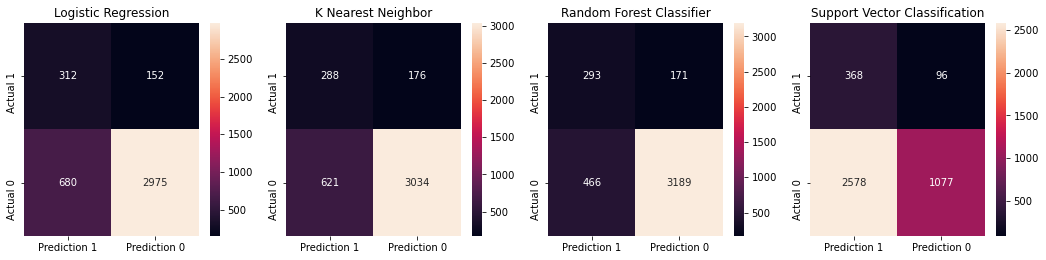

In [40]:
plt.figure(figsize=(18, 18))

plt.subplot(4,4,1)
sns.heatmap(dfLog, annot=True, fmt='d')
plt.title('Logistic Regression')

plt.subplot(4,4,2)
sns.heatmap(dfKNN, annot=True, fmt='d')
plt.title('K Nearest Neighbor')

plt.subplot(4,4,3)
sns.heatmap(dfRF, annot=True, fmt='d')
plt.title('Random Forest Classifier')

plt.subplot(4,4,4)
sns.heatmap(dfSVC, annot=True, fmt='d')
plt.title('Support Vector Classification')

plt.show()

In [41]:
import pickle
import joblib

joblib.dump(model_tuned_1_1, 'ModelBankMarketingLogRegPipe')
joblib.dump(model_tuned_2_1, 'ModelBankMarketingKNNPipe')
joblib.dump(model_tuned_3_1, 'ModelBankMarketingRFPipe')
joblib.dump(model_tuned_4_1, 'ModelBankMarketingSVCPipe')

['ModelBankMarketingSVCPipe']